In [3]:
import numpy as np
from scipy import ndimage
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()

data = np.array([[0,0,0,0,0,0,0,0],
                [0,0,1,1,1,1,0,0],
                [0,1,1,0,0,1,1,0],
                [0,1,1,0,0,1,1,0],
                [0,0,1,1,0,1,1,0],
                [0,0,0,1,1,1,0,0],
                [0,0,0,0,0,0,0,0]])

In [4]:
cx, cy = ndimage.center_of_mass(data)

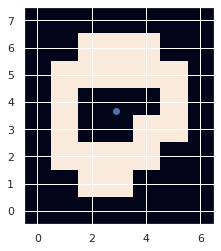

In [5]:
plt.imshow(data.T, origin = 'lower')
plt.scatter(cx,cy)


### Gaussian smoothing algorithm

Generates 2D gaussian kernel with size based on sigma, convolve with image to smoothe it. This algorithm gives border artifacts, but will be used for images where the objects of interest are in the middle of the frame. 

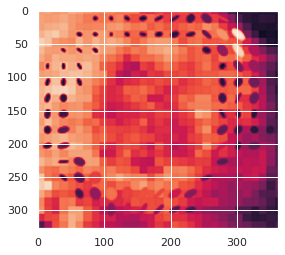

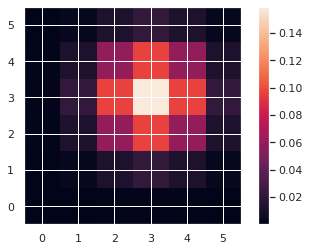

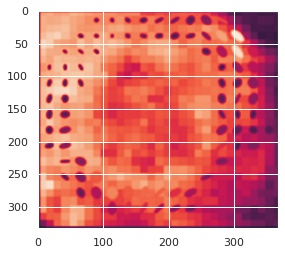

In [6]:
img = Image.open('vel.PNG').convert('L')
plt.imshow(img)
plt.show()

sigma = 1
d = round(2*np.pi*sigma)  # g size based on sigma 
#d = int(np.ceil(sigma*2*np.pi) // 2 * 2 + 1)  # force odd number
z = np.zeros((d, d))

# create gaussian, peak shifted to middle
for i in range(-d, d):
    for j in range(-d, d):
        z[i, j] = np.exp(-0.5*((i - d/2)**2 + (j - d/2)**2)/sigma**2)/(2*np.pi*sigma**2)

#np.sum(z)  # the area should be the same for any sigma

plt.imshow(z, origin = 'lower')
plt.colorbar()
plt.show()

plt.imshow(convolve2d(img, z))
plt.show()

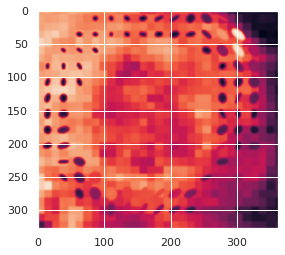

In [7]:
# compare with ndimage function
plt.imshow(gaussian_filter(img, sigma = sigma))
plt.show()

## Running average

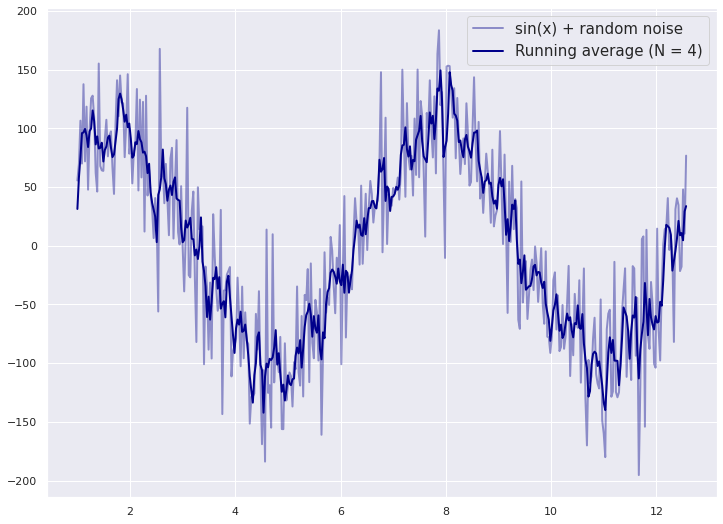

In [8]:
# running average of array a with window size N
def running_average(a, N, mode = 'same'):
    return np.convolve(a, np.ones(N)/N, mode = mode)

plt.figure(figsize=(12, 9))
x = np.linspace(1, 4*np.pi, 400)
y = 100*(np.sin(x) + np.random.normal(scale=0.4, size=len(x)))
plt.plot(x,y, 'darkblue', alpha = 0.4, label = 'sin(x) + random noise', linewidth = 2)
N = 14
n = 4
plt.plot(x, running_average(y, n), 'darkblue', label = f'Running average (N = {n})', linewidth = 2)
#plt.plot(x, running_average(y, N), 'orange', label = f'Running average (N = {N})', linewidth = 3)
plt.legend(prop={'size': 15}); plt.grid(1)
plt.savefig('Runningavg')
plt.show()

## Sinc function slice selection


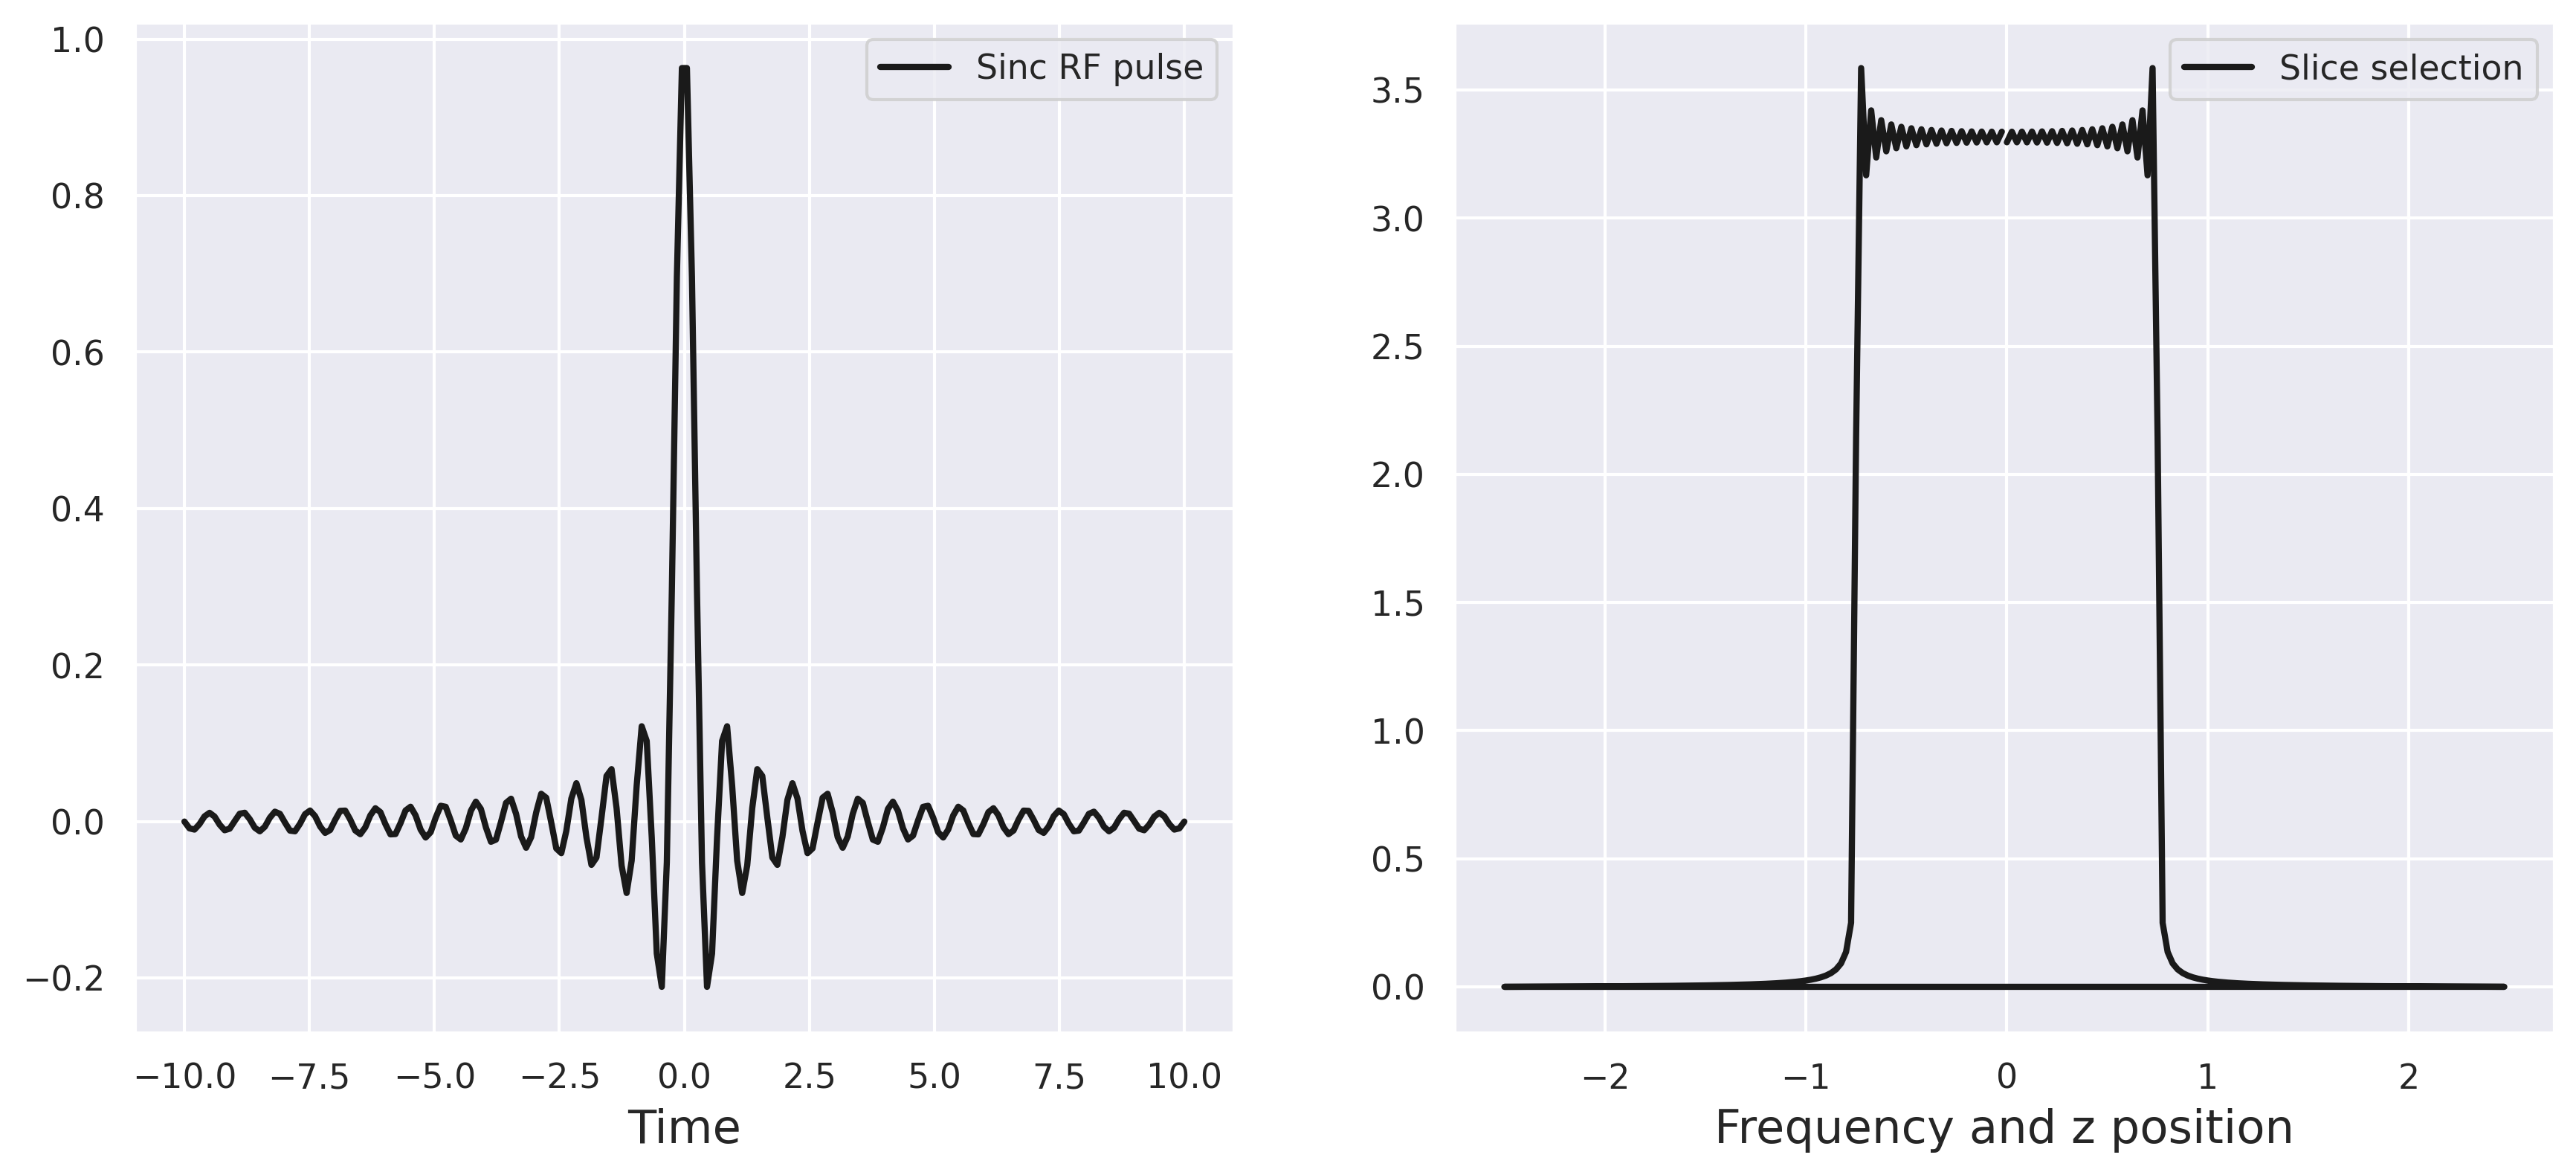

In [9]:
t = np.linspace(-10, 10, 200)
pulse = np.sinc(t*3)

freq = np.fft.fftfreq(len(t), len(t)/1000)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi = 300)

ax1.plot(t, pulse, 'k', lw = 2, label = 'Sinc RF pulse')
ax1.set_xlabel('Time', fontsize = 15)
ax1.legend()

ax2.plot(freq, abs(np.fft.fft(pulse)), 'k', lw = 2, label = 'Slice selection')
ax2.set_xlabel('Frequency and z position', fontsize = 15)

ax2.legend() 
plt.show()

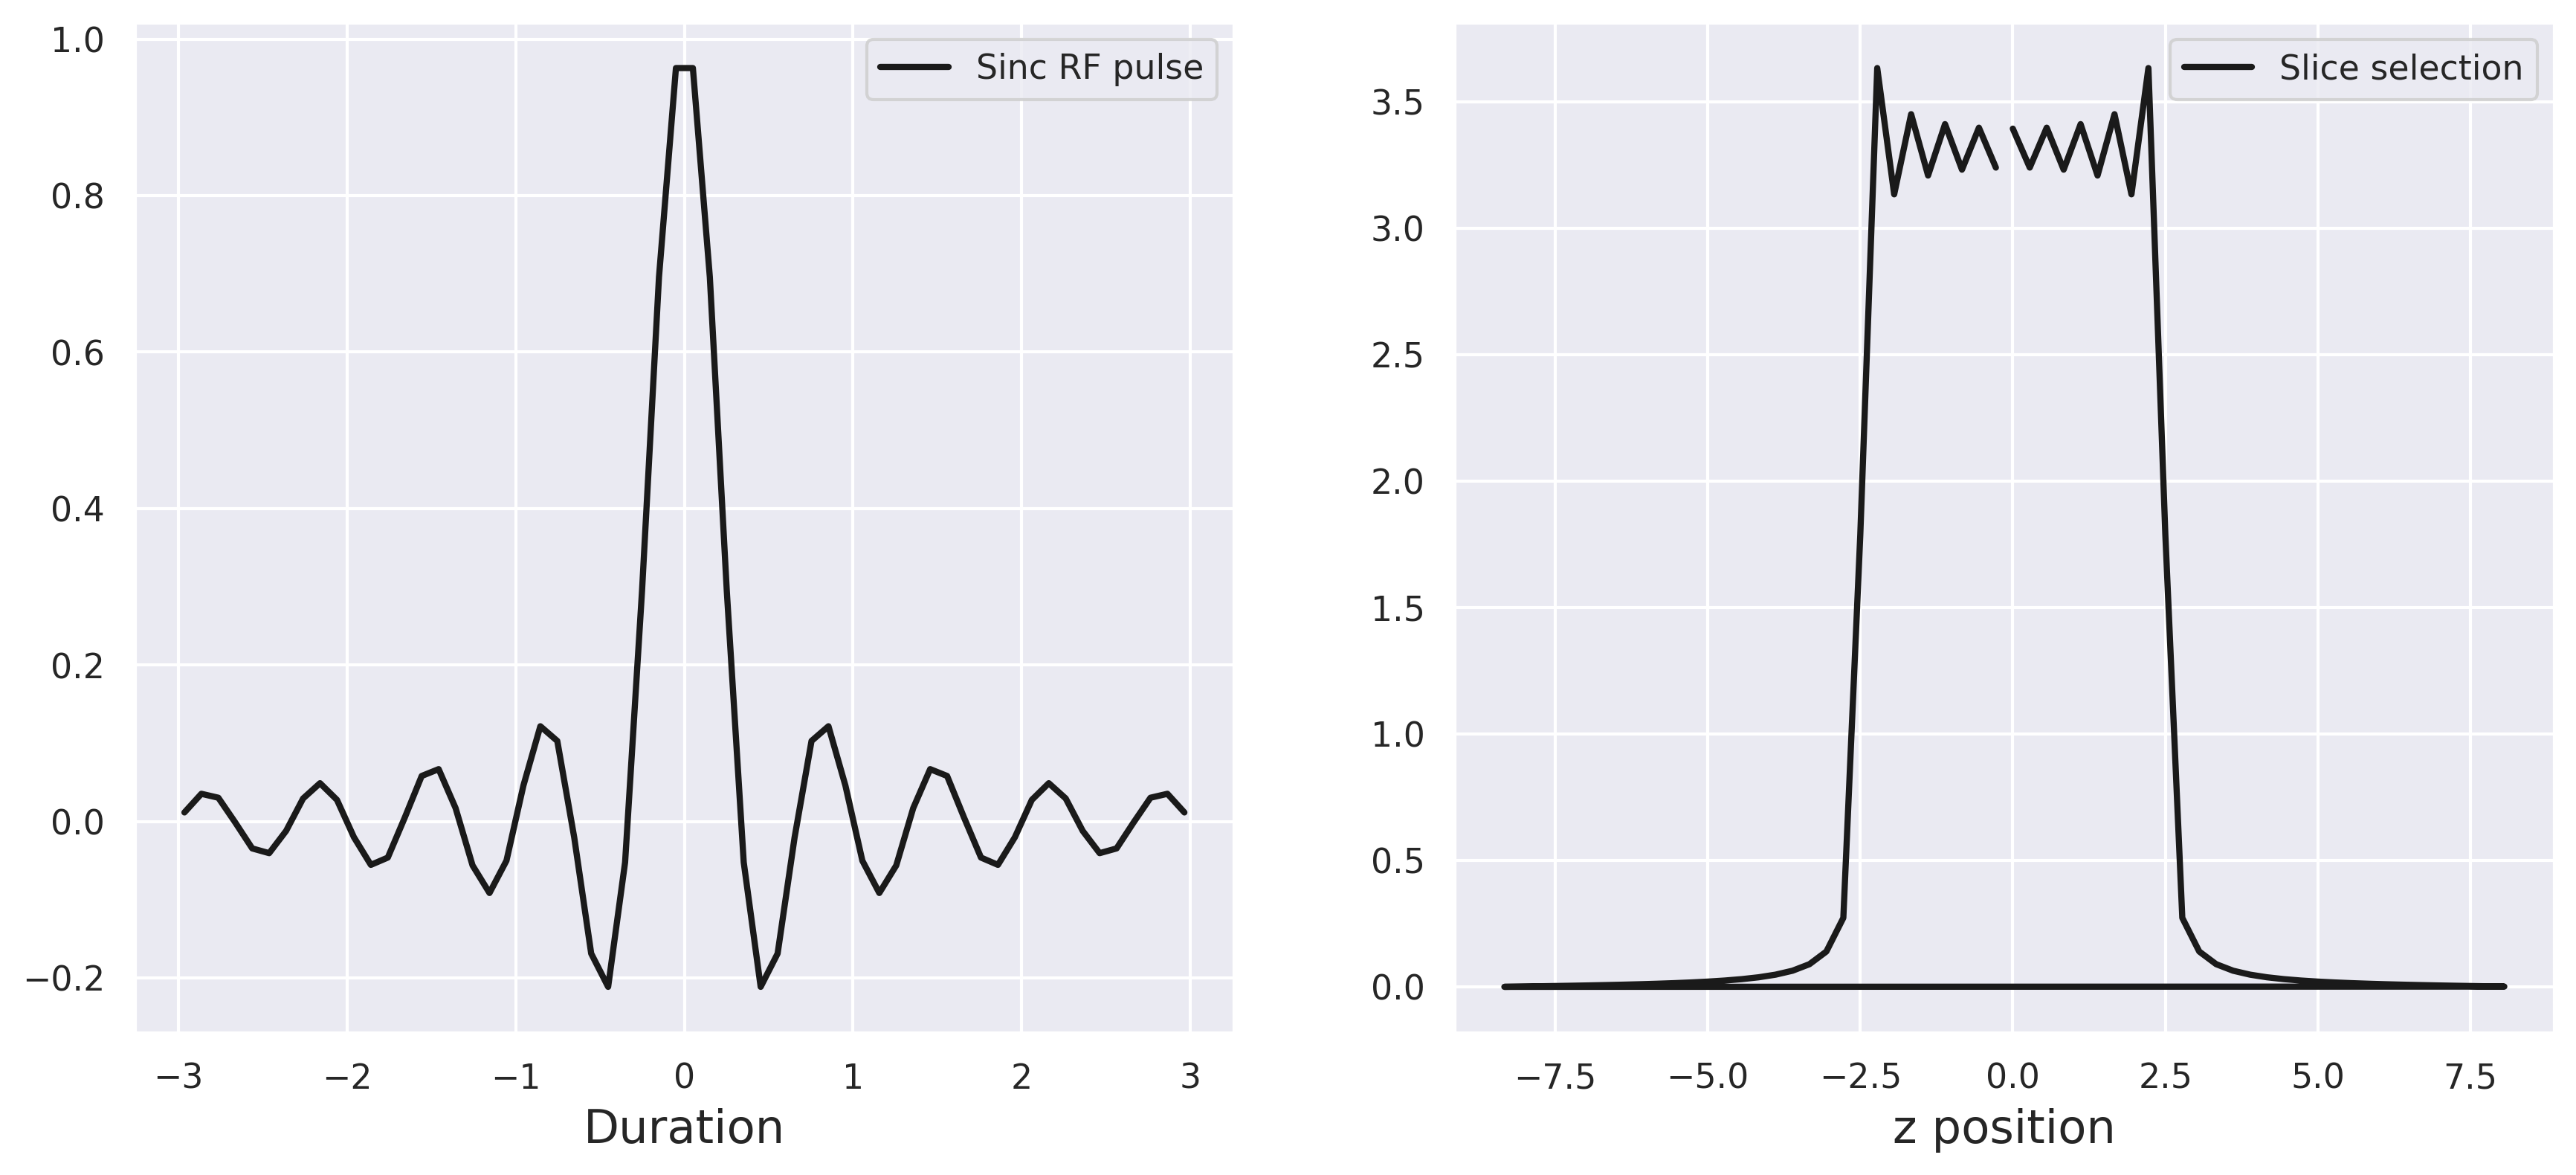

In [10]:
#t = np.linspace(-10, 10, 200)
t1 = t[70:-70]

pulse1 = np.sinc(t1*3)

freq1 = np.fft.fftfreq(len(t1), len(t1)/1000)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi = 300)

ax1.plot(t1, pulse1, 'k', lw = 2, label = 'Sinc RF pulse')
ax1.set_xlabel('Duration', fontsize = 15)
ax1.legend()

ax2.plot(freq1, abs(np.fft.fft(pulse1)), 'k', lw = 2, label = 'Slice selection')
ax2.set_xlabel('z position', fontsize = 15)

ax2.legend() 
plt.show()